<h1>Rotulação de Dados</h1>

Neste notebook é criado labels para os dados.

<h4>Rotulação de Tipo de Superfície</h4>

<table>
     <tr>
         <th>Valor</th>
         <th>Tipo</th>
         <th>Especificação</th>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Sem Pavimento</td>
         <td>Terra</td>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Pavimento Flexível</td>
         <td>Paralelepípedo/Hexagonal</td>
     </tr>
     <tr>
         <td>0,1</td>
         <td>Pavimento Rígido</td>
         <td>Asfalto</td>
     </tr>
</table>


<h4>Seleção de Dataset</h4>

In [54]:
# Saveiro 1
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-24 17-21-12 - Saveiro Cenário 1\\'

In [55]:
# Saveiro 2
folder = 'E:\\Dados Processados\\100 Hz\\2019-12-24 17-59-52 - Saveiro Cenário 2\\'

# Terra
sem_pavimento = [
    ("2019-12-24T18:00:37", "2019-12-24T18:08:02"),
]

# Paralelepípedo e Hexagonal
pavimento_flexivel = [
    ("2019-12-24T18:12:28", "2019-12-24T18:15:56"),
]

# Asfalto
pavimento_rigido = [
    ("2019-12-24T17:59:25","2019-12-24T18:00:37"),
    ("2019-12-24T18:08:02", "2019-12-24T18:12:28"),
    ("2019-12-24T18:15:56", "2019-12-24T18:20:13"),
]

In [56]:
# Saveiro 3
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-24 18-37-13 - Saveiro Cenário 3\\'

In [57]:
# Bravo 1
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-25 17-44-48 - Bravo Cenário 1\\'

In [58]:
# Bravo 2
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-25 18-17-03 - Bravo Cenário 2\\'

In [59]:
# Bravo 3
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-25 18-44-19 - Bravo Cenário 3\\'

In [60]:
# Palio 1
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-26 18-24-09 - Palio Cenário 1\\'

In [61]:
# Palio 2
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-26 18-51-03 - Palio Cenário 2\\'

In [62]:
# Palio 3
# folder = 'E:\\Dados Processados\\100 Hz\\2019-12-26 19-23-31 - Palio Cenário 3\\'

<h4>Importação de Pacotes</h4>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
from datetime import datetime
from dateutil import parser
%matplotlib notebook
pd.set_option("float_format", '{:0.10f}'.format)
pd.set_option('display.max_columns', 30)

<h4>Funções Utilitárias</h4>

In [78]:
# Transforma Date String em Timestamp Int
def parseDateToTimestamp(value):
    newDate = parser.parse(value)
    return datetime.timestamp(newDate)

# Transforma Timestamp Int em Date String 
def parseTimestampToDate(value):
    newDate = datetime.fromtimestamp(value)
    return newDate.strftime("%Y-%m-%dT%H:%M:%S")

# Transforma Array Tupla de Date para Array Tupla de Timestamp
def parseDateToTimestampTuple(values):
    
    result = []

    for i in values:
        x = parseDateToTimestamp(i[0])
        y = parseDateToTimestamp(i[1])
        result.append((x,y))

    return result

# Rotula cada amostra com base nos labels e timestamp
def mapToLabel(timestamp, ranges):
    
    for interval in ranges:
        
        if(timestamp >= interval[0] and timestamp <= interval[1]):
            return 1
        
    return 0

# Adiciona uma classe de dado como coluna no dataset
def addClassToData(data, ranges, name):
    timestamps = data['timestamp']
    values = timestamps.apply(mapToLabel, args=(ranges,))
    data.insert(len(data.columns), name, values, True)
    
# Método principal 
def processLabels(data):
    
    sem_pavimento_range = parseDateToTimestampTuple(sem_pavimento)
    addClassToData(data, sem_pavimento_range, 'terra')
    
    pavimento_flexivel_range = parseDateToTimestampTuple(pavimento_flexivel)
    addClassToData(data, pavimento_flexivel_range, 'paralelepipedo')
    
    pavimento_rigido_range = parseDateToTimestampTuple(pavimento_rigido)
    addClassToData(data, pavimento_rigido_range, 'asfalto')
    
#     file = folder + 'dataset_gps_mpu_left_labeled.csv'
#     data_direita.to_csv(file, index=False)
#     print("Salvo em ", file)

    return data

def plotClasses(data):
    
    plt.figure(figsize=(10,4)) 
    data['acc_z_below_suspension'].rolling(5).std().plot(color="y")
    # data['gyro_y_below_suspension'].plot()
    # data['gyro_x_below_suspension'].plot()
    (data['speed'] * 3.6).plot()
    (data['terra'] * 20).plot(linewidth=2)
    (data['paralelepipedo'] * 40).plot(linewidth=2)
    (data['asfalto'] * 60).plot(linewidth=2)
#     plt.legend()

<h4>Importação dos Dados</h4>

In [65]:
data_esquerda = pd.read_csv(folder + 'dataset_gps_mpu_left.csv', float_precision="high")
data_direita = pd.read_csv(folder + 'dataset_gps_mpu_right.csv', float_precision="high")

<h4>Rotulação de Dados</h4>

<IPython.core.display.Javascript object>


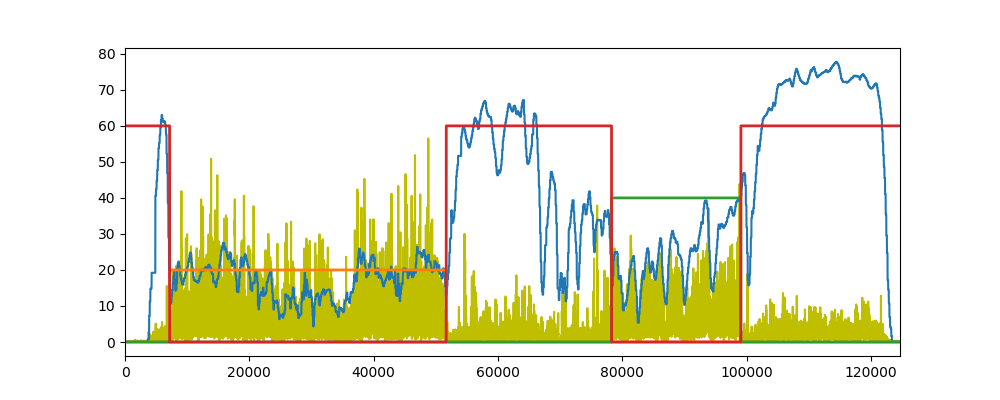

<IPython.core.display.Javascript object>


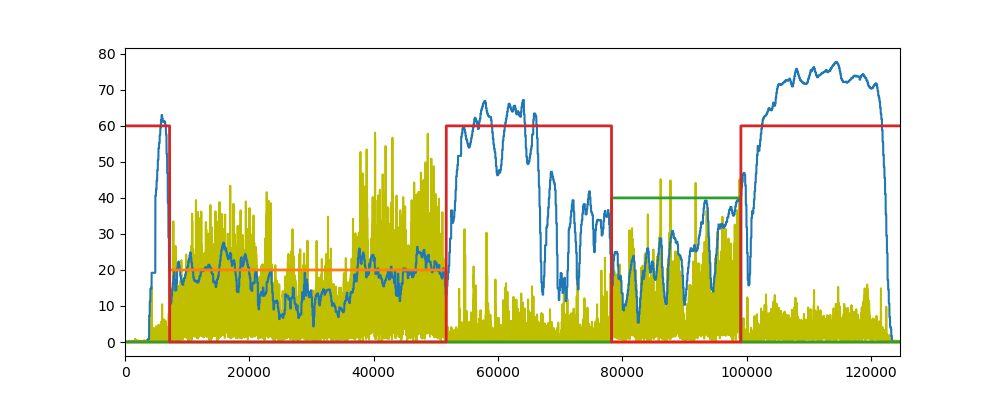

In [79]:
data_esquerda_labeled = processLabels(data_esquerda.copy())
plotClasses(data_esquerda_labeled)

data_direita_labeled = processLabels(data_direita.copy())
plotClasses(data_direita_labeled)

In [ ]:
from enum import Enum
class Colors(Enum):
    SPEED = 'k'
    DASHBOARD = 'r'
    BELLOW_SUSPENSION = 'g'
    ABOVE_SUSPENSION = 'b'

In [ ]:
Colors.SPEED